# Analyzing Tweets with Pandas and Matplotlib

Python has a variety of visualization libraries, including seaborn, networkx, and vispy. Most Python visualization libraries are based wholly or partially on matplotlib, which often makes it the first resort for making simple plots, and the last resort for making plots too complex to create in other libraries.

In this matplotlib tutorial, we'll cover the basics of the library, and walk through making some intermediate visualizations.

We'll be working with a dataset of approximately 240,000 tweets about Hillary Clinton, Donald Trump, and Bernie Sanders, all current candidates for president of the United States.

The data was pulled from the Twitter Streaming API, and the csv of all 240,000 tweets can be downloaded [here](https://s3.amazonaws.com/dqdata/tweets.csv). If you want to scrape more data yourself, you can look [here](https://github.com/dataquestio/twitter-scrape) for the scraper code.

[Source](https://www.dataquest.io/blog/matplotlib-tutorial/)

# Exploring tweets with Pandas

Before we get started with plotting, let's load in the data and do some basic exploration. We can use Pandas, a Python library for data analysis, to help us with this. In the below code, we'll:

* Import the Pandas library.
* Read tweets.csv into a Pandas DataFrame.
* Print the first 5 rows of the DataFrame.

In [84]:
import pandas as pd

tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


Here's a quick explanation of the important columns in the data:

* id — the id of the row in the database (this isn't important).
* id_str — the id of the tweet on Twitter.
* user_location — the location the tweeter specified in their Twitter bio.
* user_bg_color — the background color of the tweeter's profile.
* user_name — the Twitter username of the tweeter.
* polarity — the sentiment of the tweet, from -1, to 1. 1 indicates strong positivity, -1 strong negativity.
* created — when the tweet was sent.
* user_description — the description the tweeter specified in their bio.
* user_created — when the tweeter created their account.
* user_follower — the number of followers the tweeter has.
* text — the text of the tweet.
* subjectivity — the subjectivity or objectivity of the tweet. 0 is very objective, 1 is very subjective.

Generating a candidates column
Most of the interesting things we can do with this dataset involve comparing the tweets about one candidate to the tweets about another candidate. For example, we could compare how objective tweets about Donald Trump are to how objective tweets about Bernie Sanders are.

In order to accomplish this, we first need to generate a column that tells us what candidates are mentioned in each tweet. In the below code, we'll:

* Create a function that finds what candidate names occur in a piece of text.
* Use the apply method on DataFrames to generate a new column called candidate that contains what candidate(s) the tweet mentions.

In [89]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

In [90]:
tweets["candidate"] = tweets.apply(get_candidate,axis=1)
tweets[["text", "candidate"]].head(50)

,text,candidate
0,Make a difference vote! WV Bernie Sanders Coul...,"clinton,sanders"
1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...,trump
2,You have no one to blame but yourselves if Tru...,trump
3,'Ruin the rest of their lives': Donald Trump c...,trump
4,"RT @elianayjohnson: Per source, GOP megadonor ...",trump
5,"RT @KamVTV: Because of course they are 🙄 ""Emai...",clinton
6,RT @P0TUSTrump: .@AZEALIABANKS endorsed Trump ...,trump
7,RT @lexi4prez: serving lies https://t.co/jJM3...,
8,RT @dovorah001: I'm VERY HAPPY to help him wit...,
9,"RT @Shakestweetz: ""A brick wall is infinitely ...",clinton


Making the first plot
Now that we have the preliminaries out the way, we're ready to draw our first plot using matplotlib. In matplotlib, drawing a plot involves:

* Creating a [Figure](http://matplotlib.org/api/figure_api.html) to draw plots into.
* Creating one or more [Axes](http://matplotlib.org/api/axes_api.html) objects to draw the plots.
* Showing the figure, and any plots inside, as an image.

Because of its flexible structure, you can draw multiple plots into a single image in matplotlib. Each Axes object represents a single plot, like a bar plot or a histogram.

This may sound complicated, but matplotlib has convenience methods that do all the work of setting up a Figure and Axes object for us.

## Importing matplotlib

In order to use matplotlib, you'll need to first import the library using import matplotlib.pyplot as plt. If you're using Jupyter notebook, you can setup matplotlib to work inside the notebook using %matplotlib inline.

In [91]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We import matplotlib.pyplot because this contains the plotting functions of matplotlib. We rename it to plt for convenience, so it's faster to make plots.

Making a bar plot
Once we've imported matplotlib, we can make a bar plot of how many tweets mentioned each candidate. In order to do this, we'll:

* Use the [value_counts](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method on Pandas [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) to count up how many tweets mention each candidate.
* Use plt.bar to create a bar plot. We'll pass in a list of numbers from 0 to the number of unique values in the candidate column as the x-axis input, and the counts as the y-axis input.
* Display the counts so we have more context about what each bar represents.

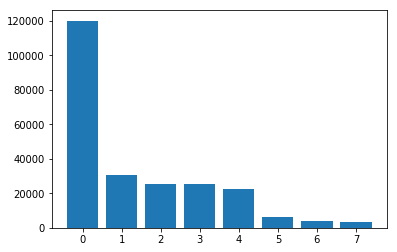

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [92]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

It's pretty surprising how many more tweets are about Trump than are about Sanders or Clinton!

You may notice that we don't create a Figure, or any Axes objects. This is because calling plt.bar will automatically setup a Figure and a single Axes object, representing the bar plot. Calling the plt.show method will show anything in the current figure. In this case, it shows an image containing a bar plot.

matplotlib has a few methods in the pyplot module that make creating common types of plots faster and more convenient because they automatically create a Figure and an Axes object. The most widely used are:

* [plt.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) — creates a bar chart.
* [plt.boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) — makes a box and whisker plot.
* [plt.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) — makes a histogram.
* [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) — creates a line plot.
* [plt.scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) — makes a scatter plot.

Calling any of these methods will automatically setup Figure and Axes objects, and draw the plot. Each of these methods has different parameters that can be passed in to modify the resulting plot.

# Customizing plots

Now that we've made a basic first plot, we can move on to creating a more customized second plot. We'll make a basic histogram, then modify it to add labels and other information.

One of the things we can look at is the age of the user accounts that are tweeting. We'll be able to find if there differences in when the accounts of users who tweet about Trump and when the accounts of users who tweet about Clinton were created. One candidate having more user accounts created recently might imply some kind of manipulation of Twitter with fake accounts.

In the code below, we'll:

* Convert the created and user_created columns to the Pandas datetime type.
* Create a user_age column that is the number of years since the account was created.
* Create a histogram of user ages.
* Show the histogram.

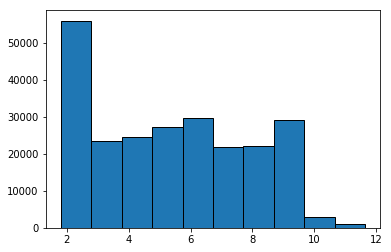

In [93]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"], edgecolor='black')
plt.show()

Adding labels
We can add titles and axis labels to matplotlib plots. The common methods with which to do this are:

* [plt.title](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title) — adds a title to the plot.
* [plt.xlabel](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlabel) — adds an x-axis label.
* [plt.ylabel](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel) — adds a y-axis label.

Since all of the methods we discussed before, like bar and hist, automatically create a Figure and a single Axes object inside the figure, these labels will be added to the Axes object when the method is called.

We can add labels to our previous histogram using the above methods. In the code below, we'll:

* Generate the same histogram we did before.
* Draw a title onto the histogram.
* Draw an x axis label onto the histogram.
* Draw a y axis label onto the histogram.
* Show the plot.

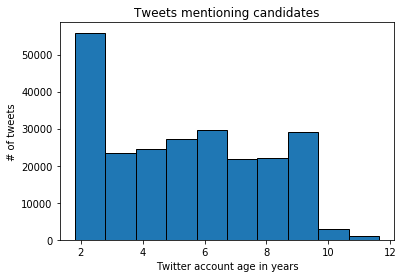

In [94]:
plt.hist(tweets["user_age"], edgecolor='black')
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

## Making a stacked histogram

The current histogram does a nice job of telling us the account age of all tweeters, but it doesn't break it down by candidate, which might be more interesting. We can leverage the additional options in the hist method to create a stacked histogram.

In the below code, we'll:

* Generate three Pandas series, each containing the user_age data only for tweets about a certain candidate.
* Make a stacked histogram by calling the hist method with additional options.
    * Specifying a list as the input will plot three sets of histogram bars.
    * Specifying stacked=True will stack the three sets of bars.
    * Adding the label option will generate the correct labels for the legend.
* Call the plt.legend method to draw a legend in the top right corner.
* Add a title, x axis, and y axis labels.
* Show the plot.

/Users/kolobj/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


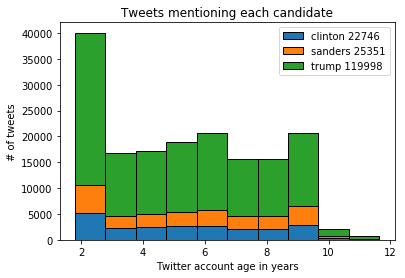

In [106]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton {}".format(len(cl_tweets.index)), 
           "sanders {}".format(len(sa_tweets.index)), 
           "trump {}".format(len(tr_tweets.index))],
    edgecolor='black'
)
plt.legend(loc=1)
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

## Annotating the histogram

We can take advantage of matplotlibs ability to draw text over plots to add annotations. Annotations point to a specific part of the chart, and let us add a snippet describing something to look at.

In the code below, we'll make the same histogram as we did above, but we'll call the plt.annotate method to add an annotation to the plot.

/Users/kolobj/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


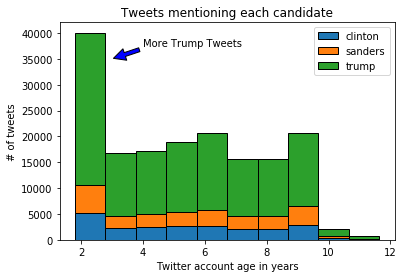

In [117]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"],
    edgecolor='black'
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")

plt.annotate('More Trump Tweets',
            xy=(3, 35000), xycoords='data',
            xytext=(4, 37000), textcoords='data',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')

plt.show()
plt.close()

Here's a description of what the options passed into annotate do:

* xy — determines the x and y coordinates where the arrow should start.
* xytext — determines the x and y coordinates where the text should start.
* arrowprops — specify options about the arrow, such as color.

As you can see, there are significantly more tweets about Trump then there are about other candidates, but there doesn't look to be a significant difference in account ages.

# Multiple subplots

So far, we've been using methods like plt.bar and plt.hist, which automatically create a Figure object and an Axes object. However, we can explicitly create these objects when we want more control over our plots. One situation in which we would want more control is when we want to put multiple plots side by side in the same image.

We can generate a Figure and multiple Axes objects by calling the plt.subplots methods. We pass in two arguments, nrows, and ncols, which define the layout of the Axes objects in the Figure. For example, plt.subplots(nrows=2, ncols=2) will generate 2x2 grid of Axes objects. plt.subplots(nrows=2, ncols=1) will generate a 2x1 grid of Axes objects, and stack the two Axes vertically.

Each Axes object supports most of the methods from pyplot. For instance, we could call the bar method on an Axes object to generate a bar chart.

## Extracting colors

We'll generate 4 plots that show the amount of the colors red and blue in the Twitter background colors of users tweeting about Trump. This may show if tweeters who identify as Republican are more likely to put red in their profile.

First, we'll generate two columns, red and blue, that tell us how much of each color is in each tweeter's profile background, from 0 to 1.

In the code below, we'll:

* Use the apply method to go through each row in the user_bg_color column, and extract how much red is in it.
* Use the apply method to go through each row in the user_bg_color column, and extract how much blue is in it.

In [123]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

## Creating the plot
Once we have the data setup, we can create the plots. Each plot will be a histogram showing how many tweeters have a profile background containing a certain amount of blue or red.

In the below code, we:

* Generate a Figure and multiple Axes with the subplots method. The axes will be returned as an array.
* The axes are returned in a 2x2 NumPy array. We extract each individual Axes object by using the flat property of arrays. This gives us 4 Axes objects we can work with.
* Plot a histogram in the first Axes using the hist method.
* Set the title of the first Axes to Red in all backgrounds using the set_title method. This performs the same function as plt.title.
* Plot a histogram in the second Axes using the hist method.
* Set the title of the second Axes to Red in Trump tweeters using the set_title method.
* Plot a histogram in the third Axes using the hist method.
* Set the title of the third Axes to Blue in all backgrounds using the set_title method. This performs the same function as plt.title.
* Plot a histogram in the fourth Axes using the hist method.
* Set the title of the fourth Axes to Blue in Trump tweeters using the set_title method.
* Call the plt.tight_layout method to reduce padding in the graphs and fit all the elements.
* Show the plot.

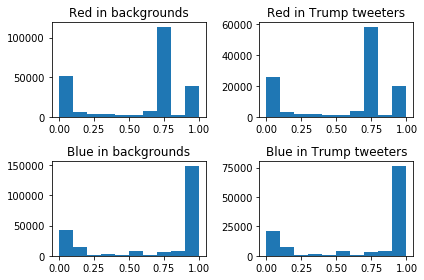

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# ax0 = axes[0][0]
# ax1 = axes[0][1]
# ax2 = axes[1][0]
# ax3 = axes[1][1]
ax0, ax1, ax2, ax3 = axes.flat
# ax = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

## Removing common background colors

Twitter has default profile background colors that we should probably remove so we can cut through the noise and generate a more accurate plot. The colors are in hexadecimal format, where #000000 is black, and #ffffff is white.

Here's how to find the most common colors in background colors:

In [135]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
DBE9ED      1113
ABB8C2      1101
8B542B      1073
3B94D9       623
89C9FA       414
DD2E44       351
94D487       318
4A913C       300
9266CC       287
F5ABB5       267
           ...  
EBEB17         1
51207A         1
6298B3         1
FCCFC4         1
99C4E8         1
D2DBDB         1
1A1A04         1
D9D5D8         1
5E808A         1
B8000F         1
1AEB55         1
CCFFCC         1
5C468F         1
9E7979         1
B89046         1
FAE6EE         1
010308         1
3A3B42         1
030C1A         1
B300FA         1
07E6A7         1
8CE4FA         1
FF0044         1
51EDA4         1
0D1FE0         1
9B8FA6         1
D8E1E6         1
DADAE6        

Now, we can remove the three most common colors, and only plot out users who have unique background colors. The code below is mostly what we did earlier, but we'll:

* Remove C0DEED, 000000, and F5F8FA from user_bg_color.
* Create a function with out plotting logic from the last chart inside.
* Plot the same 4 plots from before without the most common colors in user_bg_color.

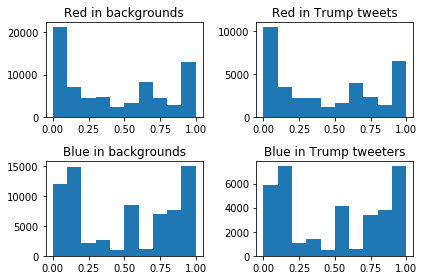

In [141]:
mask = ~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])
tc = tweets[mask]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

As you can see, the distribution of blue and red in background colors for users that tweeted about Trump is almost identical to the distribution for all tweeters.

# Plotting sentiment
We generated sentiment scores for each tweet using TextBlob, which are stored in the polarity column. We can plot the mean value for each candidate, along with the standard deviation. The standard deviation will tell us how wide the variation is between all the tweets, whereas the mean will tell us how the average tweet is.

In order to do this, we can add 2 Axes to a single Figure, and plot the mean of polarity in one, and the standard deviation in the other. Because there are a lot of text labels in these plots, we'll need to increase the size of the generated figure to match. We can do this with the figsize option in the plt.subplots method.

The code below will:

* Group tweets by candidate, and compute the mean and standard deviation for each numerical column (including polarity).
* Create a Figure that's 7 inches by 7 inches, with 2 Axes objects, arranged vertically.
* Create a bar plot of the standard deviation the first Axes object.
    * Set the tick labels using the set_xticklabels method, and rotate the labels 45 degrees using the rotation argument.
    * Set the title.
* Create a bar plot of the mean on the second Axes object.
    * Set the tick labels.
    * Set the title.
* Show the plot.


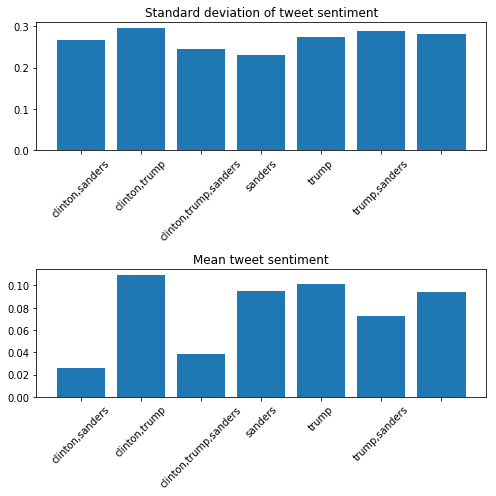

In [142]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

# Generating a side by side bar plot
We can plot tweet length by candidate using a bar plot. We'll first split the tweets into short, medium, and long tweets. Then, we'll count up how many tweets mentioning each candidate fall into each group. Then, we'll generate a bar plot with bars for each candidate side by side.

## Generating tweet lengths
To plot the tweet lengths, we'll first have to categorize the tweets, then figure out how many tweets by each candidate fall into each bin.

In the code below, we'll:

* Define a function to mark a tweet as short if it's less than 100 characters, medium if it's 100 to 135 characters, and long if it's over 135 characters.
* Use apply to generate a new column tweet_length.
* Figure out how many tweets by each candidate fall into each group.

In [143]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

## Plotting
Now that we have the data we want to plot, we can generate our side by side bar plot. We'll use the bar method to plot the tweet lengths for each candidate on the same axis. However, we'll use an offset to shift the bars to the right for the second and third candidates we plot. This will give us three category areas, short, medium, and long, with one bar for each candidate in each area.

In the code below, we:

* Create a Figure and a single Axes object.
* Define the width for each bar, .5.
* Generate a sequence of values, x, that is 0, 2, 4. Each value is the start of a category, such as short, medium, and long. We put a distance of 2 between each category so we have space for multiple bars.
* Plot clinton tweets on the Axes object, with the bars at the positions defined by x.
* Plot sanders tweets on the Axes object, but add width to x to move the bars to the right.
* Plot trump tweets on the Axes object, but add width * 2 to x to move the bars to the far right.
* Set the axis labels and title.
* Use set_xticks to move the tick labels to the center of each category area.
* Set tick labels.

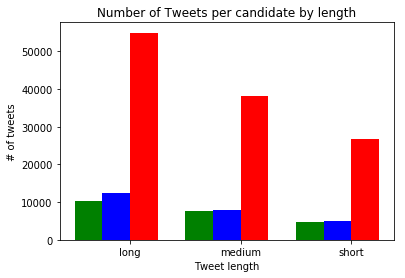

In [144]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

# Next steps
You can make quite a few plots next:

* Analyze user descriptions, and see how description length varies by candidate.
* Explore time of day — do supporters of one candidate tweet more at certain times?
* Explore user location, and see which states tweet about which candidates the most.
* See what kinds of usernames tweet more about what kinds of candidates.
    * Do more digits in usernames correlate with support for a candidate?
    * Which candidate has the most all caps supporters?
* Scrape more data, and see if the patterns shift.